In [1]:
import pandas as pd
import thinkplot
import numpy as np
import re
import thinkstats2

Read in cleaned time series data and find correlations between percent female and pay gap and between percent female and total weekly pay for each occupation.  

In [40]:
df = pd.read_excel('Data/weeklyincome_occupation_gender_combined_clean_all.xlsx')
df = df.set_index('Occupation')
df.head()

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay
Occupation,,,,,
Total fulltime wage and salary workers,"[44.497996833005956, 44.39843915530758, 44.252...","[184.0, 171.0, 166.0, 169.0, 152.0, 154.0, 163...","[886.0, 860.0, 832.0, 809.0, 791.0, 776.0, 768...","[789.0, 770.0, 749.0, 726.0, 719.0, 706.0, 691...","[973.0, 941.0, 915.0, 895.0, 871.0, 860.0, 854..."
Management professional and related occupations,"[51.47311916079331, 51.672421462918635, 51.543...","[390.0, 390.0, 393.0, 387.0, 365.0, 376.0, 377...","[1246.0, 1224.0, 1188.0, 1158.0, 1137.0, 1132....","[1078.0, 1052.0, 1027.0, 996.0, 981.0, 973.0, ...","[1468.0, 1442.0, 1420.0, 1383.0, 1346.0, 1349...."
Management business and financial operations occupations,"[46.29210089110406, 46.35314721335119, 46.0547...","[369.0, 392.0, 392.0, 363.0, 360.0, 363.0, 394...","[1355.0, 1327.0, 1284.0, 1258.0, 1227.0, 1208....","[1168.0, 1134.0, 1099.0, 1073.0, 1056.0, 1049....","[1537.0, 1526.0, 1491.0, 1436.0, 1416.0, 1412...."
Management occupations,"[42.472360317578094, 42.524109651454175, 41.42...","[349.0, 400.0, 391.0, 347.0, 327.0, 353.0, 392...","[1429.0, 1392.0, 1370.0, 1351.0, 1295.0, 1285....","[1236.0, 1173.0, 1148.0, 1139.0, 1127.0, 1103....","[1585.0, 1573.0, 1539.0, 1486.0, 1454.0, 1456...."
Chief executives,"[27.959927140255008, 27.55281690140845, 27.652...","[752.0, 495.0, 543.0, 415.0, 674.0, 455.0, 545...","[2291.0, 2296.0, 2303.0, 2041.0, 2023.0, 2069....","[1736.0, 1920.0, 1876.0, 1836.0, 1572.0, 1811....","[2488.0, 2415.0, 2419.0, 2251.0, 2246.0, 2266...."


Find correlations and add to df

In [41]:
df['Correlation1'] = pd.Series() # with total weekly pay
df['Correlation2'] = pd.Series() # with pay gap
for occ in df.index:
    temp_percent_female = np.asarray(eval(df.loc[occ]['Percent Female']))
    temp_total_pay = np.asarray(eval(df.loc[occ]['Total Weekly Pay']))
    temp_pay_gap = np.asarray(eval(df.loc[occ]['Pay Gap']))
    corr1 = thinkstats2.Cov(temp_percent_female, temp_total_pay)
    corr2 = thinkstats2.Cov(temp_percent_female, temp_pay_gap)
    df.at[occ, 'Correlation1'] = corr1
    df.at[occ, 'Correlation2'] = corr2

In [42]:
df.head()

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Correlation1,Correlation2
Occupation,,,,,,,
Total fulltime wage and salary workers,"[44.497996833005956, 44.39843915530758, 44.252...","[184.0, 171.0, 166.0, 169.0, 152.0, 154.0, 163...","[886.0, 860.0, 832.0, 809.0, 791.0, 776.0, 768...","[789.0, 770.0, 749.0, 726.0, 719.0, 706.0, 691...","[973.0, 941.0, 915.0, 895.0, 871.0, 860.0, 854...",17.465067,2.937715
Management professional and related occupations,"[51.47311916079331, 51.672421462918635, 51.543...","[390.0, 390.0, 393.0, 387.0, 365.0, 376.0, 377...","[1246.0, 1224.0, 1188.0, 1158.0, 1137.0, 1132....","[1078.0, 1052.0, 1027.0, 996.0, 981.0, 973.0, ...","[1468.0, 1442.0, 1420.0, 1383.0, 1346.0, 1349....",45.388539,12.290132
Management business and financial operations occupations,"[46.29210089110406, 46.35314721335119, 46.0547...","[369.0, 392.0, 392.0, 363.0, 360.0, 363.0, 394...","[1355.0, 1327.0, 1284.0, 1258.0, 1227.0, 1208....","[1168.0, 1134.0, 1099.0, 1073.0, 1056.0, 1049....","[1537.0, 1526.0, 1491.0, 1436.0, 1416.0, 1412....",60.803302,7.515539
Management occupations,"[42.472360317578094, 42.524109651454175, 41.42...","[349.0, 400.0, 391.0, 347.0, 327.0, 353.0, 392...","[1429.0, 1392.0, 1370.0, 1351.0, 1295.0, 1285....","[1236.0, 1173.0, 1148.0, 1139.0, 1127.0, 1103....","[1585.0, 1573.0, 1539.0, 1486.0, 1454.0, 1456....",113.176014,10.400149
Chief executives,"[27.959927140255008, 27.55281690140845, 27.652...","[752.0, 495.0, 543.0, 415.0, 674.0, 455.0, 545...","[2291.0, 2296.0, 2303.0, 2041.0, 2023.0, 2069....","[1736.0, 1920.0, 1876.0, 1836.0, 1572.0, 1811....","[2488.0, 2415.0, 2419.0, 2251.0, 2246.0, 2266....",273.211889,31.398657


In [43]:
df.to_excel('Data/weeklyincome_occupation_gender_combined_clean_all_correlations.xlsx')

Sort `df` by `Correlation1` in ascending order

## HERE

In [44]:
df_sorted_corr1 = df.sort_values(by=['Correlation1'], ascending=True)
df_sorted_corr1.iloc[:10]

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Correlation1,Correlation2
Occupation,,,,,,,
Advertising sales agents,"[46.74556213017752, 54.92227979274611, 39.9014...","[-103.0, 13.0, 35.0, 426.0, 170.0, 137.0, 103....","[998.0, 887.0, 1023.0, 925.0, 942.0, 938.0, 90...","[1053.0, 882.0, 999.0, 729.0, 871.0, 868.0, 84...","[950.0, 895.0, 1034.0, 1155.0, 1041.0, 1005.0,...",-329.670142,290.665331
Computer programmers,"[21.261682242990652, 21.04018912529551, 25.806...","[217.0, 176.0, 154.0, 199.0, 194.0, 266.0, 215...","[1591.0, 1483.0, 1398.0, 1438.0, 1409.0, 1372....","[1445.0, 1363.0, 1312.0, 1302.0, 1253.0, 1162....","[1662.0, 1539.0, 1466.0, 1501.0, 1447.0, 1428....",-237.477380,-1.826928
Electrical electronics and electromechanical assemblers,"[48.18181818181818, 40.65040650406504, 47.6190...","[188.0, 95.0, 64.0, 22.0, 92.0, 32.0, 100.0, 1...","[605.0, 624.0, 590.0, 554.0, 547.0, 503.0, 564...","[518.0, 587.0, 554.0, 544.0, 506.0, 490.0, 520...","[706.0, 682.0, 618.0, 566.0, 598.0, 522.0, 620...",-223.153793,38.508745
Sales representatives services all other,"[26.46370023419204, 26.200873362445414, 33.957...","[412.0, 430.0, 376.0, 448.0, 220.0, 247.0, 167...","[1230.0, 1147.0, 1040.0, 966.0, 948.0, 948.0, ...","[933.0, 902.0, 826.0, 699.0, 766.0, 766.0, 825...","[1345.0, 1332.0, 1202.0, 1147.0, 986.0, 1013.0...",-217.144816,-138.128161
Software developers applications and systems software,"[20.297951582867785, 18.415566365531618, 19.68...","[250.0, 320.0, 310.0, 336.0, 279.0, 367.0, 312...","[1864.0, 1792.0, 1776.0, 1682.0, 1693.0, 1643....","[1644.0, 1543.0, 1553.0, 1415.0, 1457.0, 1370....","[1894.0, 1863.0, 1863.0, 1751.0, 1736.0, 1737....",-188.403037,-22.897768
Management analysts,"[43.93700787401575, 42.07920792079208, 43.2478...","[205.0, 336.0, 244.0, 171.0, 426.0, 295.0, 210...","[1532.0, 1499.0, 1476.0, 1431.0, 1470.0, 1450....","[1437.0, 1315.0, 1342.0, 1348.0, 1239.0, 1319....","[1642.0, 1651.0, 1586.0, 1519.0, 1665.0, 1614....",-181.772976,-17.785361
Computer support specialists,"[27.131782945736433, 27.99097065462754, 25.254...","[99.0, 215.0, 64.0, 227.0, 212.0, 118.0, 104.0...","[1085.0, 1068.0, 1060.0, 1079.0, 966.0, 980.0,...","[1015.0, 919.0, 1014.0, 908.0, 837.0, 901.0, 8...","[1114.0, 1134.0, 1078.0, 1135.0, 1049.0, 1019....",-158.820484,-43.187964
Computer and information systems managers,"[25.45757071547421, 27.77777777777778, 25.3378...","[193.0, 268.0, 76.0, 254.0, 234.0, 220.0, 213....","[1877.0, 1843.0, 1738.0, 1728.0, 1730.0, 1728....","[1727.0, 1629.0, 1680.0, 1563.0, 1529.0, 1549....","[1920.0, 1897.0, 1756.0, 1817.0, 1763.0, 1769....",-153.572356,99.420793
Inspectors testers sorters samplers and weighers,"[35.317460317460316, 38.35425383542538, 35.131...","[189.0, 216.0, 250.0, 261.0, 242.0, 252.0, 254...","[771.0, 765.0, 714.0, 710.0, 728.0, 741.0, 729...","[679.0, 637.0, 584.0, 583.0, 578.0, 583.0, 570...","[868.0, 853.0, 834.0, 844.0, 820.0, 835.0, 824...",-109.215008,-30.375045


A negative correlation between percent female and total weekly pay indicates that as percent female increases, the total median weekly pay decreases. The occupations with the highest correlation are Advertising sales agents and Computer programmers, which we will plot.

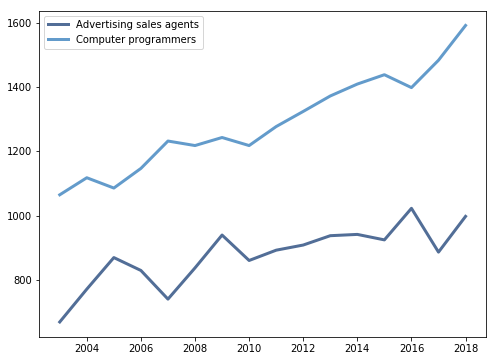

In [55]:
years = range(2003, 2019)
for occupation in df_sorted_corr1.index[:2]:
    
    percent_female = eval(df_sorted_corr1.loc[occupation]['Percent Female'])[::-1]
    total_weekly_pay = eval(df_sorted_corr1.loc[occupation]['Total Weekly Pay'])[::-1]
    female_weekly_pay = eval(df_sorted_corr1.loc[occupation]['Female Weekly Pay'])[::-1]
    male_weekly_pay = eval(df_sorted_corr1.loc[occupation]['Male Weekly Pay'])[::-1]
    pay_gap = eval(df_sorted_corr1.loc[occupation]['Pay Gap'])[::-1]

    thinkplot.Plot(years, total_weekly_pay, label=occupation)

thinkplot.Show()

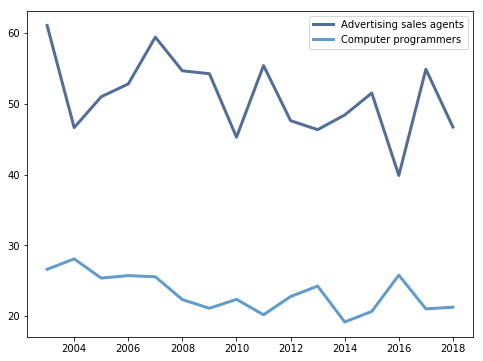

In [56]:
years = range(2003, 2019)
for occupation in df_sorted_corr1.index[:2]:
    
    percent_female = eval(df_sorted_corr1.loc[occupation]['Percent Female'])[::-1]
    total_weekly_pay = eval(df_sorted_corr1.loc[occupation]['Total Weekly Pay'])[::-1]
    female_weekly_pay = eval(df_sorted_corr1.loc[occupation]['Female Weekly Pay'])[::-1]
    male_weekly_pay = eval(df_sorted_corr1.loc[occupation]['Male Weekly Pay'])[::-1]
    pay_gap = eval(df_sorted_corr1.loc[occupation]['Pay Gap'])[::-1]

    thinkplot.Plot(years, percent_female, label=occupation)

thinkplot.Show()

In [512]:
df_combined_all_sorted_corr1.iloc[-10:]

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Correlation1,Correlation2
Occupation,,,,,,,
Counselors,"[71.77304964539007, 72.61538461538461, 71.9939...","[91.0, 7.0, -15.0, 6.0, 54.0, 5.0, -22.0, 66.0...","[941.0, 897.0, 904.0, 904.0, 849.0, 885.0, 848...","[913.0, 894.0, 907.0, 902.0, 831.0, 884.0, 855...","[1004.0, 901.0, 892.0, 908.0, 885.0, 889.0, 83...",137.527043,-50.385612
Personal financial advisors,"[35.26570048309179, 32.914572864321606, 35.588...","[440.0, 683.0, 761.0, 705.0, 633.0, 416.0, 516...","[1473.0, 1425.0, 1404.0, 1419.0, 1337.0, 1424....","[1207.0, 979.0, 953.0, 1033.0, 1004.0, 1149.0,...","[1647.0, 1662.0, 1714.0, 1738.0, 1637.0, 1565....",142.579396,300.099731
Postsecondary teachers,"[46.27766599597585, 44.06091370558375, 45.4081...","[350.0, 206.0, 204.0, 261.0, 266.0, 238.0, 311...","[1439.0, 1312.0, 1247.0, 1258.0, 1256.0, 1172....","[1253.0, 1208.0, 1152.0, 1144.0, 1143.0, 1100....","[1603.0, 1414.0, 1356.0, 1405.0, 1409.0, 1338....",167.744052,19.528853
Lawyers,"[40.328253223915596, 43.149807938540334, 40.13...","[440.0, 352.0, 467.0, 197.0, 325.0, 420.0, 419...","[1947.0, 1901.0, 1897.0, 1886.0, 1807.0, 1880....","[1762.0, 1753.0, 1619.0, 1717.0, 1590.0, 1566....","[2202.0, 2105.0, 2086.0, 1914.0, 1915.0, 1986....",207.089590,61.227527
Marketing and sales managers,"[46.41744548286604, 43.05835010060362, 43.7567...","[490.0, 459.0, 603.0, 345.0, 474.0, 534.0, 530...","[1567.0, 1509.0, 1468.0, 1462.0, 1405.0, 1389....","[1362.0, 1288.0, 1142.0, 1258.0, 1150.0, 1124....","[1852.0, 1747.0, 1745.0, 1603.0, 1624.0, 1658....",229.541359,67.668466
Chief executives,"[27.959927140255008, 27.55281690140845, 27.652...","[752.0, 495.0, 543.0, 415.0, 674.0, 455.0, 545...","[2291.0, 2296.0, 2303.0, 2041.0, 2023.0, 2069....","[1736.0, 1920.0, 1876.0, 1836.0, 1572.0, 1811....","[2488.0, 2415.0, 2419.0, 2251.0, 2246.0, 2266....",273.211889,31.398657
Purchasing managers,"[44.5945945945946, 53.608247422680414, 49.1978...","[202.0, 282.0, 231.0, 178.0, 90.0, 151.0, 395....","[1362.0, 1271.0, 1274.0, 1348.0, 1329.0, 1358....","[1229.0, 1138.0, 1169.0, 1226.0, 1276.0, 1290....","[1431.0, 1420.0, 1400.0, 1404.0, 1366.0, 1441....",303.856150,30.920775
Human resources managers,"[75.17006802721087, 69.4078947368421, 72.24334...","[431.0, 468.0, 454.0, 221.0, 527.0, 296.0, 239...","[1381.0, 1448.0, 1340.0, 1365.0, 1382.0, 1327....","[1330.0, 1280.0, 1283.0, 1274.0, 1300.0, 1240....","[1761.0, 1748.0, 1737.0, 1495.0, 1827.0, 1536....",363.180220,-40.327640
Physicians and surgeons,"[42.563482466747274, 43.190184049079754, 38.21...","[836.0, 518.0, 867.0, 382.0, 756.0, 590.0, 681...","[2001.0, 1918.0, 1916.0, 1824.0, 1661.0, 1885....","[1677.0, 1759.0, 1476.0, 1533.0, 1246.0, 1497....","[2513.0, 2277.0, 2343.0, 1915.0, 2002.0, 2087....",380.482372,-88.269987


Sort `df_combined_all_new` by `Correlation2` in ascending order

In [509]:
df_combined_all_sorted_corr2 = df_combined_all_new.sort_values(by=['Correlation2'], ascending=True)
df_combined_all_sorted_corr2.iloc[:10]

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Correlation1,Correlation2
Occupation,,,,,,,
Sales representatives services all other,"[26.46370023419204, 26.200873362445414, 33.957...","[412.0, 430.0, 376.0, 448.0, 220.0, 247.0, 167...","[1230.0, 1147.0, 1040.0, 966.0, 948.0, 948.0, ...","[933.0, 902.0, 826.0, 699.0, 766.0, 766.0, 825...","[1345.0, 1332.0, 1202.0, 1147.0, 986.0, 1013.0...",-217.144816,-138.128161
Physicians and surgeons,"[42.563482466747274, 43.190184049079754, 38.21...","[836.0, 518.0, 867.0, 382.0, 756.0, 590.0, 681...","[2001.0, 1918.0, 1916.0, 1824.0, 1661.0, 1885....","[1677.0, 1759.0, 1476.0, 1533.0, 1246.0, 1497....","[2513.0, 2277.0, 2343.0, 1915.0, 2002.0, 2087....",380.482372,-88.269987
Insurance sales agents,"[56.00858369098712, 55.00000000000001, 48.4633...","[239.0, 263.0, 490.0, 311.0, 248.0, 296.0, 385...","[859.0, 897.0, 839.0, 815.0, 765.0, 838.0, 827...","[809.0, 795.0, 676.0, 717.0, 698.0, 733.0, 641...","[1048.0, 1058.0, 1166.0, 1028.0, 946.0, 1029.0...",20.269784,-86.156591
Wholesale and retail buyers except farm products,"[44.21768707482993, 56.493506493506494, 54.605...","[-2.0, -6.0, 177.0, -99.0, 164.0, -59.0, 6.0, ...","[878.0, 886.0, 838.0, 926.0, 859.0, 899.0, 850...","[880.0, 888.0, 765.0, 985.0, 806.0, 930.0, 847...","[878.0, 882.0, 942.0, 886.0, 970.0, 871.0, 853...",47.136819,-55.573938
Counselors,"[71.77304964539007, 72.61538461538461, 71.9939...","[91.0, 7.0, -15.0, 6.0, 54.0, 5.0, -22.0, 66.0...","[941.0, 897.0, 904.0, 904.0, 849.0, 885.0, 848...","[913.0, 894.0, 907.0, 902.0, 831.0, 884.0, 855...","[1004.0, 901.0, 892.0, 908.0, 885.0, 889.0, 83...",137.527043,-50.385612
Clinical laboratory technologists and technicians,"[74.13793103448276, 68.35016835016835, 67.1186...","[-92.0, 216.0, 237.0, 293.0, 60.0, 122.0, 101....","[893.0, 890.0, 887.0, 901.0, 824.0, 891.0, 869...","[911.0, 845.0, 834.0, 796.0, 818.0, 858.0, 842...","[819.0, 1061.0, 1071.0, 1089.0, 878.0, 980.0, ...",4.781177,-47.956708
Credit counselors and loan officers,"[53.31325301204819, 60.3125, 56.98005698005698...","[495.0, 374.0, 405.0, 280.0, 273.0, 298.0, 224...","[1168.0, 1070.0, 1054.0, 997.0, 997.0, 970.0, ...","[948.0, 958.0, 926.0, 906.0, 915.0, 864.0, 850...","[1443.0, 1332.0, 1331.0, 1186.0, 1188.0, 1162....",-40.773288,-44.662169
Bartenders,"[54.90909090909091, 53.333333333333336, 48.221...","[41.0, 85.0, 203.0, 76.0, 175.0, 111.0, 99.0, ...","[581.0, 554.0, 602.0, 521.0, 522.0, 513.0, 460...","[560.0, 515.0, 498.0, 493.0, 459.0, 483.0, 421...","[601.0, 600.0, 701.0, 569.0, 634.0, 594.0, 520...",25.623578,-44.439454
Computer support specialists,"[27.131782945736433, 27.99097065462754, 25.254...","[99.0, 215.0, 64.0, 227.0, 212.0, 118.0, 104.0...","[1085.0, 1068.0, 1060.0, 1079.0, 966.0, 980.0,...","[1015.0, 919.0, 1014.0, 908.0, 837.0, 901.0, 8...","[1114.0, 1134.0, 1078.0, 1135.0, 1049.0, 1019....",-158.820484,-43.187964


In [511]:
df_combined_all_sorted_corr2.iloc[-10:]

,Percent Female,Pay Gap,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Correlation1,Correlation2
Occupation,,,,,,,
Education administrators,"[65.69428238039673, 62.047440699126085, 64.558...","[318.0, 318.0, 248.0, 333.0, 268.0, 413.0, 514...","[1381.0, 1367.0, 1381.0, 1423.0, 1272.0, 1259....","[1245.0, 1243.0, 1280.0, 1252.0, 1171.0, 1130....","[1563.0, 1561.0, 1528.0, 1585.0, 1439.0, 1543....",72.490332,41.297576
Real estate brokers and sales agents,"[55.11363636363637, 55.122950819672134, 57.606...","[381.0, 341.0, 442.0, 317.0, 265.0, 172.0, 351...","[1019.0, 953.0, 983.0, 837.0, 852.0, 809.0, 78...","[883.0, 818.0, 780.0, 735.0, 726.0, 756.0, 680...","[1264.0, 1159.0, 1222.0, 1052.0, 991.0, 928.0,...",-53.622326,44.260760
Lawyers,"[40.328253223915596, 43.149807938540334, 40.13...","[440.0, 352.0, 467.0, 197.0, 325.0, 420.0, 419...","[1947.0, 1901.0, 1897.0, 1886.0, 1807.0, 1880....","[1762.0, 1753.0, 1619.0, 1717.0, 1590.0, 1566....","[2202.0, 2105.0, 2086.0, 1914.0, 1915.0, 1986....",207.089590,61.227527
Pharmacists,"[62.737642585551335, 57.874015748031496, 59.90...","[381.0, 394.0, 257.0, 306.0, 274.0, 290.0, 8.0...","[2071.0, 1923.0, 1924.0, 1920.0, 1995.0, 1960....","[1890.0, 1834.0, 1839.0, 1811.0, 1902.0, 1802....","[2271.0, 2228.0, 2096.0, 2117.0, 2176.0, 2092....",653.953516,65.059190
Postal service mail carriers,"[40.97222222222222, 40.6015037593985, 39.14473...","[175.0, 109.0, 89.0, 167.0, 174.0, 134.0, 119....","[931.0, 944.0, 981.0, 954.0, 966.0, 964.0, 990...","[808.0, 856.0, 931.0, 854.0, 851.0, 878.0, 907...","[983.0, 965.0, 1020.0, 1021.0, 1025.0, 1012.0,...",40.418039,66.761940
Marketing and sales managers,"[46.41744548286604, 43.05835010060362, 43.7567...","[490.0, 459.0, 603.0, 345.0, 474.0, 534.0, 530...","[1567.0, 1509.0, 1468.0, 1462.0, 1405.0, 1389....","[1362.0, 1288.0, 1142.0, 1258.0, 1150.0, 1124....","[1852.0, 1747.0, 1745.0, 1603.0, 1624.0, 1658....",229.541359,67.668466
Computer and information systems managers,"[25.45757071547421, 27.77777777777778, 25.3378...","[193.0, 268.0, 76.0, 254.0, 234.0, 220.0, 213....","[1877.0, 1843.0, 1738.0, 1728.0, 1730.0, 1728....","[1727.0, 1629.0, 1680.0, 1563.0, 1529.0, 1549....","[1920.0, 1897.0, 1756.0, 1817.0, 1763.0, 1769....",-153.572356,99.420793
Social and community service managers,"[69.14600550964187, 70.02967359050444, 68.3195...","[279.0, 229.0, 214.0, 177.0, 164.0, 146.0, 268...","[1141.0, 1136.0, 1079.0, 1022.0, 1008.0, 1042....","[1057.0, 1052.0, 992.0, 965.0, 978.0, 1004.0, ...","[1336.0, 1281.0, 1206.0, 1142.0, 1142.0, 1150....",130.847410,134.271159
Advertising sales agents,"[46.74556213017752, 54.92227979274611, 39.9014...","[-103.0, 13.0, 35.0, 426.0, 170.0, 137.0, 103....","[998.0, 887.0, 1023.0, 925.0, 942.0, 938.0, 90...","[1053.0, 882.0, 999.0, 729.0, 871.0, 868.0, 84...","[950.0, 895.0, 1034.0, 1155.0, 1041.0, 1005.0,...",-329.670142,290.665331


Find the occupations that changed the most in terms percent female and female weekly pay

In [204]:
def find_diff(val1, val2):
    if type(val1) == str:
        val1 = val1.replace('$', '')
        val1 = val1.replace(',', '')
        val1 = int(val1) 
    if type(val2) == str:
        val2 = val2.replace('$', '')
        val2 = val2.replace(',', '')
        val2 = int(val2)
    return abs(val1-val2)

In [447]:
df_combined_all_new['Percent Female Change'] = pd.Series()
df_combined_all_new['Female Weekly Pay Change'] = pd.Series()
percent_female_changes = []
female_weekly_pay_changes = []
for occupation in df_combined_all_new.index:
    percent_female = df_combined_all_new.loc[occupation]['Percent Female']
    female_weekly_pay = df_combined_all_new.loc[occupation]['Female Weekly Pay']
    
    #percent_female_change = abs(percent_female[0]-percent_female[-1])
    percent_female_change = percent_female[0]-percent_female[-1]
    female_weekly_pay_change = find_diff(female_weekly_pay[0],female_weekly_pay[-1])
        
    percent_female_changes.append(percent_female_change)
    female_weekly_pay_changes.append(female_weekly_pay_change)
    
df_combined_all_new['Percent Female Change'] = percent_female_changes
df_combined_all_new['Female Weekly Pay Change'] = female_weekly_pay_changes

In [449]:
df_combined_all_sorted = df_combined_all_new.sort_values(by=['Percent Female Change'], ascending=False)
df_combined_all_sorted.iloc[:10]

,Percent Female,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Percent Female Change,Female Weekly Pay Change
Occupation,,,,,,
Pharmacists,"[62.737642585551335, 57.874015748031496, 59.90...","[2071, 1923, 1924, 1920, 1,995, 1,960, 1,877, ...","[1890, 1834, 1839, 1811, 1,902, 1,802, 1,871, ...","[2271, 2228, 2096, 2117, 2,176, 2,092, 1,879, ...",15.301745,526.0
Physicians and surgeons,"[42.563482466747274, 43.190184049079754, 38.21...","[2001, 1918, 1916, 1824, 1,661, 1,885, 1,887, ...","[1677, 1759, 1476, 1533, 1,246, 1,497, 1,418, ...","[2513, 2277, 2343, 1915, 2,002, 2,087, 2,099, ...",11.113388,688.0
Human resources managers,"[75.17006802721087, 69.4078947368421, 72.24334...","[1381, 1448, 1340, 1365, 1,382, 1,327, 1,271, ...","[1330, 1280, 1283, 1274, 1,300, 1,240, 1,208, ...","[1761, 1748, 1737, 1495, 1,827, 1,536, 1,447, ...",9.722914,458.0
Postal service mail carriers,"[40.97222222222222, 40.6015037593985, 39.14473...","[931, 944, 981, 954, 966, 964, 990, 979, 936.0...","[808, 856, 931, 854, 851, 878, 907, 892, 897.0...","[983, 965, 1020, 1021, 1,025, 1,012, 1,026, 1,...",8.877628,43.0
Lawyers,"[40.328253223915596, 43.149807938540334, 40.13...","[1947, 1901, 1897, 1886, 1,807, 1,880, 1,909, ...","[1762, 1753, 1619, 1717, 1,590, 1,566, 1,636, ...","[2202, 2105, 2086, 1914, 1,915, 1,986, 2,055, ...",8.821404,349.0
Marketing and sales managers,"[46.41744548286604, 43.05835010060362, 43.7567...","[1567, 1509, 1468, 1462, 1,405, 1,389, 1,396, ...","[1362, 1288, 1142, 1258, 1,150, 1,124, 1,110, ...","[1852, 1747, 1745, 1603, 1,624, 1,658, 1,640, ...",8.667445,458.0
Insurance sales agents,"[56.00858369098712, 55.00000000000001, 48.4633...","[859, 897, 839, 815, 765, 838, 827, 807, 741.0...","[809, 795, 676, 717, 698, 733, 641, 665, 649.0...","[1048, 1058, 1166, 1028, 946, 1,029, 1,026, 1,...",7.850689,200.0
Food preparation workers,"[56.448202959830866, 52.74509803921569, 54.926...","[463, 425, 419, 402, 406, 387, 383, 384, 381.0...","[446, 410, 413, 388, 401, 380, 357, 375, 367.0...","[486, 449, 432, 414, 411, 392, 408, 395, 390.0...",6.612137,136.0
Food service managers,"[49.21402660217654, 48.28431372549019, 46.0526...","[809, 753, 739, 742, 704, 701, 689, 660, 709.0...","[708, 674, 632, 680, 595, 620, 601, 599, 626.0...","[922, 894, 853, 820, 806, 801, 744, 734, 796.0...",6.328651,124.0


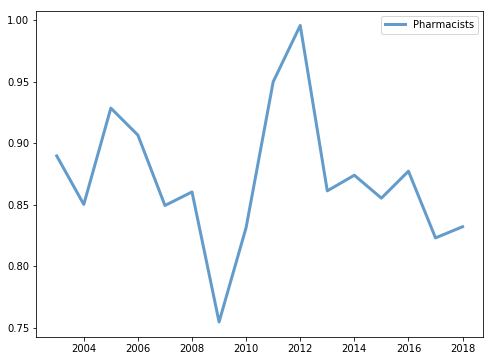

In [464]:
years = range(2003, 2019)
for occupation in df_combined_all_sorted.index[:1]:
    
    percent_female = df_combined_all_sorted.loc[occupation]['Percent Female'][::-1]
    total_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Total Weekly Pay'][::-1])
    female_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Female Weekly Pay'][::-1])
    male_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Male Weekly Pay'][::-1])
    pay_gap = [x/y for x, y in zip(female_weekly_pay, male_weekly_pay)]
    thinkplot.Plot(years, pay_gap, label=occupation)

thinkplot.Show()

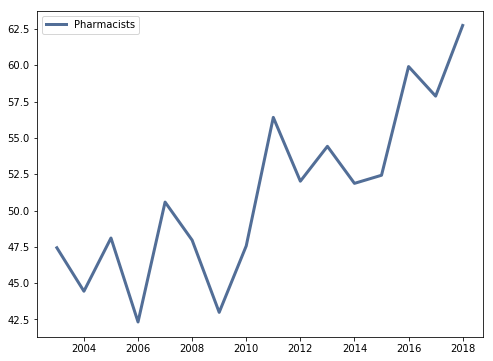

In [465]:
years = range(2003, 2019)
for occupation in df_combined_all_sorted.index[:1]:
    
    percent_female = df_combined_all_sorted.loc[occupation]['Percent Female'][::-1]
    total_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Total Weekly Pay'][::-1])
    female_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Female Weekly Pay'][::-1])
    male_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Male Weekly Pay'][::-1])
    thinkplot.Plot(years, percent_female, label=occupation)

thinkplot.Show()

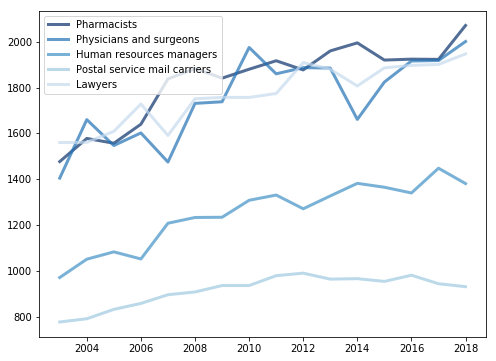

In [460]:
years = range(2003, 2019)
for occupation in df_combined_all_sorted.index[:5]:
    
    percent_female = df_combined_all_sorted.loc[occupation]['Percent Female'][::-1]
    total_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Total Weekly Pay'][::-1])
    female_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Female Weekly Pay'][::-1])
    male_weekly_pay = clean_pay(df_combined_all_sorted.loc[occupation]['Male Weekly Pay'][::-1])
    thinkplot.Plot(years, total_weekly_pay, label=occupation)

thinkplot.Show()

In [212]:
df_combined_new['Percent Female Change'] = pd.Series()
df_combined_new['Female Weekly Pay Change'] = pd.Series()
percent_female_changes = []
female_weekly_pay_changes = []
for occupation in df_combined_new.index:
    percent_female = df_combined_new.loc[occupation]['Percent Female']
    female_weekly_pay = df_combined_new.loc[occupation]['Female Weekly Pay']
    
    #percent_female_change = abs(percent_female[0]-percent_female[-1])
    percent_female_change = percent_female[0]-percent_female[-1]
    female_weekly_pay_change = find_diff(female_weekly_pay[0],female_weekly_pay[-1])
        
    percent_female_changes.append(percent_female_change)
    female_weekly_pay_changes.append(female_weekly_pay_change)
    
df_combined_new['Percent Female Change'] = percent_female_changes
df_combined_new['Female Weekly Pay Change'] = female_weekly_pay_changes

Sort by percent female change

In [453]:
df_combined_sorted = df_combined_new.sort_values(by=['Percent Female Change'], ascending=False)
df_combined_sorted.iloc[:10]

,Percent Female,Total Weekly Pay,Female Weekly Pay,Male Weekly Pay,Percent Female Change,Female Weekly Pay Change
Occupation,,,,,,
Compliance officers,"[53.597122302158276, 55.833333333333336, 57.93...","[1296, 1391, 1243, 1198, 1,157, 1,124, 1,183, ...","[1165, 1296, 1163, 1025, 1,092, 1,081, 999, 995]","[1450, 1501, 1274, 1375, 1,237, 1,170, 1,304, ...",9.278940,170
Postal service mail carriers,"[40.97222222222222, 40.6015037593985, 39.14473...","[931, 944, 981, 954, 966, 964, 990, 979]","[808, 856, 931, 854, 851, 878, 907, 892]","[983, 965, 1020, 1021, 1,025, 1,012, 1,026, 1,...",8.628988,84
Bakers,"[58.94039735099338, 50.37037037037037, 60.1449...","[549, 472, 494, 505, 492, 505, 474, 448]","[533, 464, 480, 475, 469, 524, 450, 416]","[565, 488, 562, 570, 518, 488, 501, 471]",8.540397,117
Physical therapists,"[66.50717703349282, 64.83516483516483, 64.9746...","[1395, 1317, 1325, 1265, 1,387, 1,382, 1,287, ...","[1387, 1297, 1306, 1215, 1,307, 1,300, 1,190, ...","[1410, 1341, 1348, 1347, 1,478, 1,457, 1,362, ...",6.918136,171
Miscellaneous agricultural workers,"[20.2808112324493, 18.116975748930102, 16.8437...","[552, 517, 508, 445, 421, 428, 426, 419]","[474, 453, 423, 398, 369, 352, 350, 370]","[578, 553, 524, 460, 437, 447, 444, 427]",6.652493,104
Physicians and surgeons,"[42.563482466747274, 43.190184049079754, 38.21...","[2001, 1918, 1916, 1824, 1,661, 1,885, 1,887, ...","[1677, 1759, 1476, 1533, 1,246, 1,497, 1,418, ...","[2513, 2277, 2343, 1915, 2,002, 2,087, 2,099, ...",6.612348,150
Pharmacists,"[62.737642585551335, 57.874015748031496, 59.90...","[2071, 1923, 1924, 1920, 1,995, 1,960, 1,877, ...","[1890, 1834, 1839, 1811, 1,902, 1,802, 1,871, ...","[2271, 2228, 2096, 2117, 2,176, 2,092, 1,879, ...",6.327386,8
Laborers and freight stock and material movers hand,"[19.93730407523511, 17.517241379310345, 15.596...","[603, 578, 566, 526, 533, 511, 510, 509]","[541, 500, 509, 455, 476, 421, 476, 416]","[620, 595, 580, 547, 546, 524, 519, 520]",6.048415,125
Lawyers,"[40.328253223915596, 43.149807938540334, 40.13...","[1947, 1901, 1897, 1886, 1,807, 1,880, 1,909, ...","[1762, 1753, 1619, 1717, 1,590, 1,566, 1,636, ...","[2202, 2105, 2086, 1914, 1,915, 1,986, 2,055, ...",5.953253,131


In [451]:
def clean_pay(pays):
    cleaned_pay = []
    for pay in pays:
        if type(pay) == str:
            pay = pay.replace('$', '')
            pay = pay.replace(',', '')
            pay = int(pay)
        cleaned_pay.append(pay)
    return cleaned_pay

Plot data

In [221]:
def clean_pay(pays):
    cleaned_pay = []
    for pay in pays:
        if type(pay) == str:
            pay = pay.replace('$', '')
            pay = pay.replace(',', '')
            pay = int(pay)
        cleaned_pay.append(pay)
    return cleaned_pay

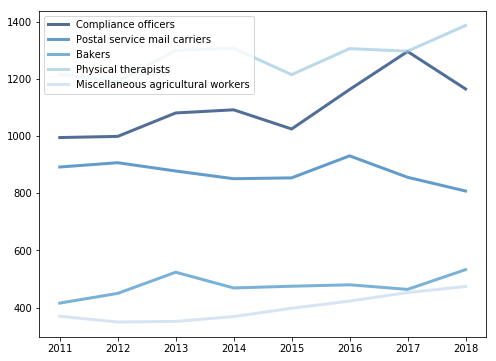

In [222]:
years = range(2011, 2019)
for occupation in df_combined_sorted.index[:5]:
    
    percent_female = df_combined_sorted.loc[occupation]['Percent Female'][::-1]
    total_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Total Weekly Pay'][::-1])
    female_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Female Weekly Pay'][::-1])
    male_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Male Weekly Pay'][::-1])
    
    thinkplot.Plot(years, female_weekly_pay, label=occupation)

thinkplot.Show()

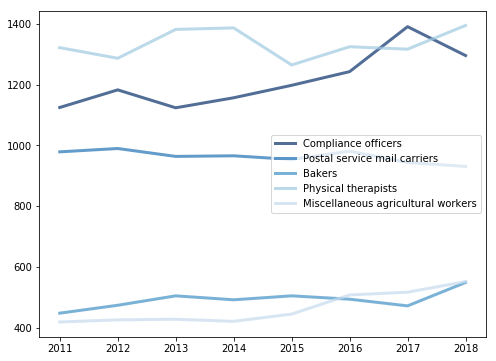

In [223]:
years = range(2011, 2019)
for occupation in df_combined_sorted.index[:5]:
    
    percent_female = df_combined_sorted.loc[occupation]['Percent Female'][::-1]
    total_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Total Weekly Pay'][::-1])
    female_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Female Weekly Pay'][::-1])
    male_weekly_pay = clean_pay(df_combined_sorted.loc[occupation]['Male Weekly Pay'][::-1])
    
    thinkplot.Plot(years, total_weekly_pay, label=occupation)

thinkplot.Show()

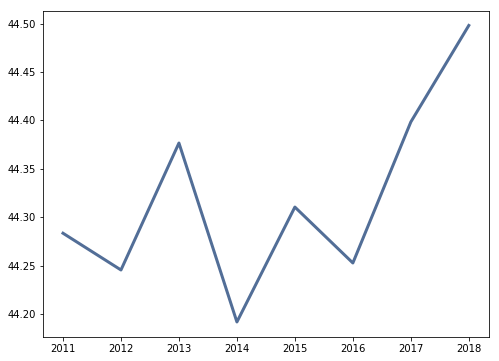

In [191]:
years = range(2011, 2019)
thinkplot.Plot(years, percent_female)
thinkplot.Show()